# 📍 **Árvore de Decisão**

Neste documento, estamos utilizando o arquivo `'census.pkl'` para realizar a classificação do dataframe `'census.csv'` por meio do algoritmo de árvore de decisão.

### 📍 **Importação de Bibliotecas, Módulos e Variáveis essenciais**


In [5]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
with open('../dataframe/census.pkl', 'rb') as f:
    X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set = pickle.load(f)

In [7]:
X_census_training_set.shape, y_census_training_set.shape

((27676, 108), (27676,))

In [6]:
X_census_test_set.shape, y_census_test_set.shape

((4885, 108), (4885,))

### 📍 **O Algoritmo de Árvore de Decisão**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [41]:
tree_census = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
tree_census.fit(X_census_training_set, y_census_training_set)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [42]:
predictor = tree_census.predict(X_census_test_set)
predictor

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [43]:
y_census_test_set

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [44]:
tree_census.classes_

array([' <=50K', ' >50K'], dtype=object)

In [51]:
tree_census.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.52449738, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
atributes = ['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country']

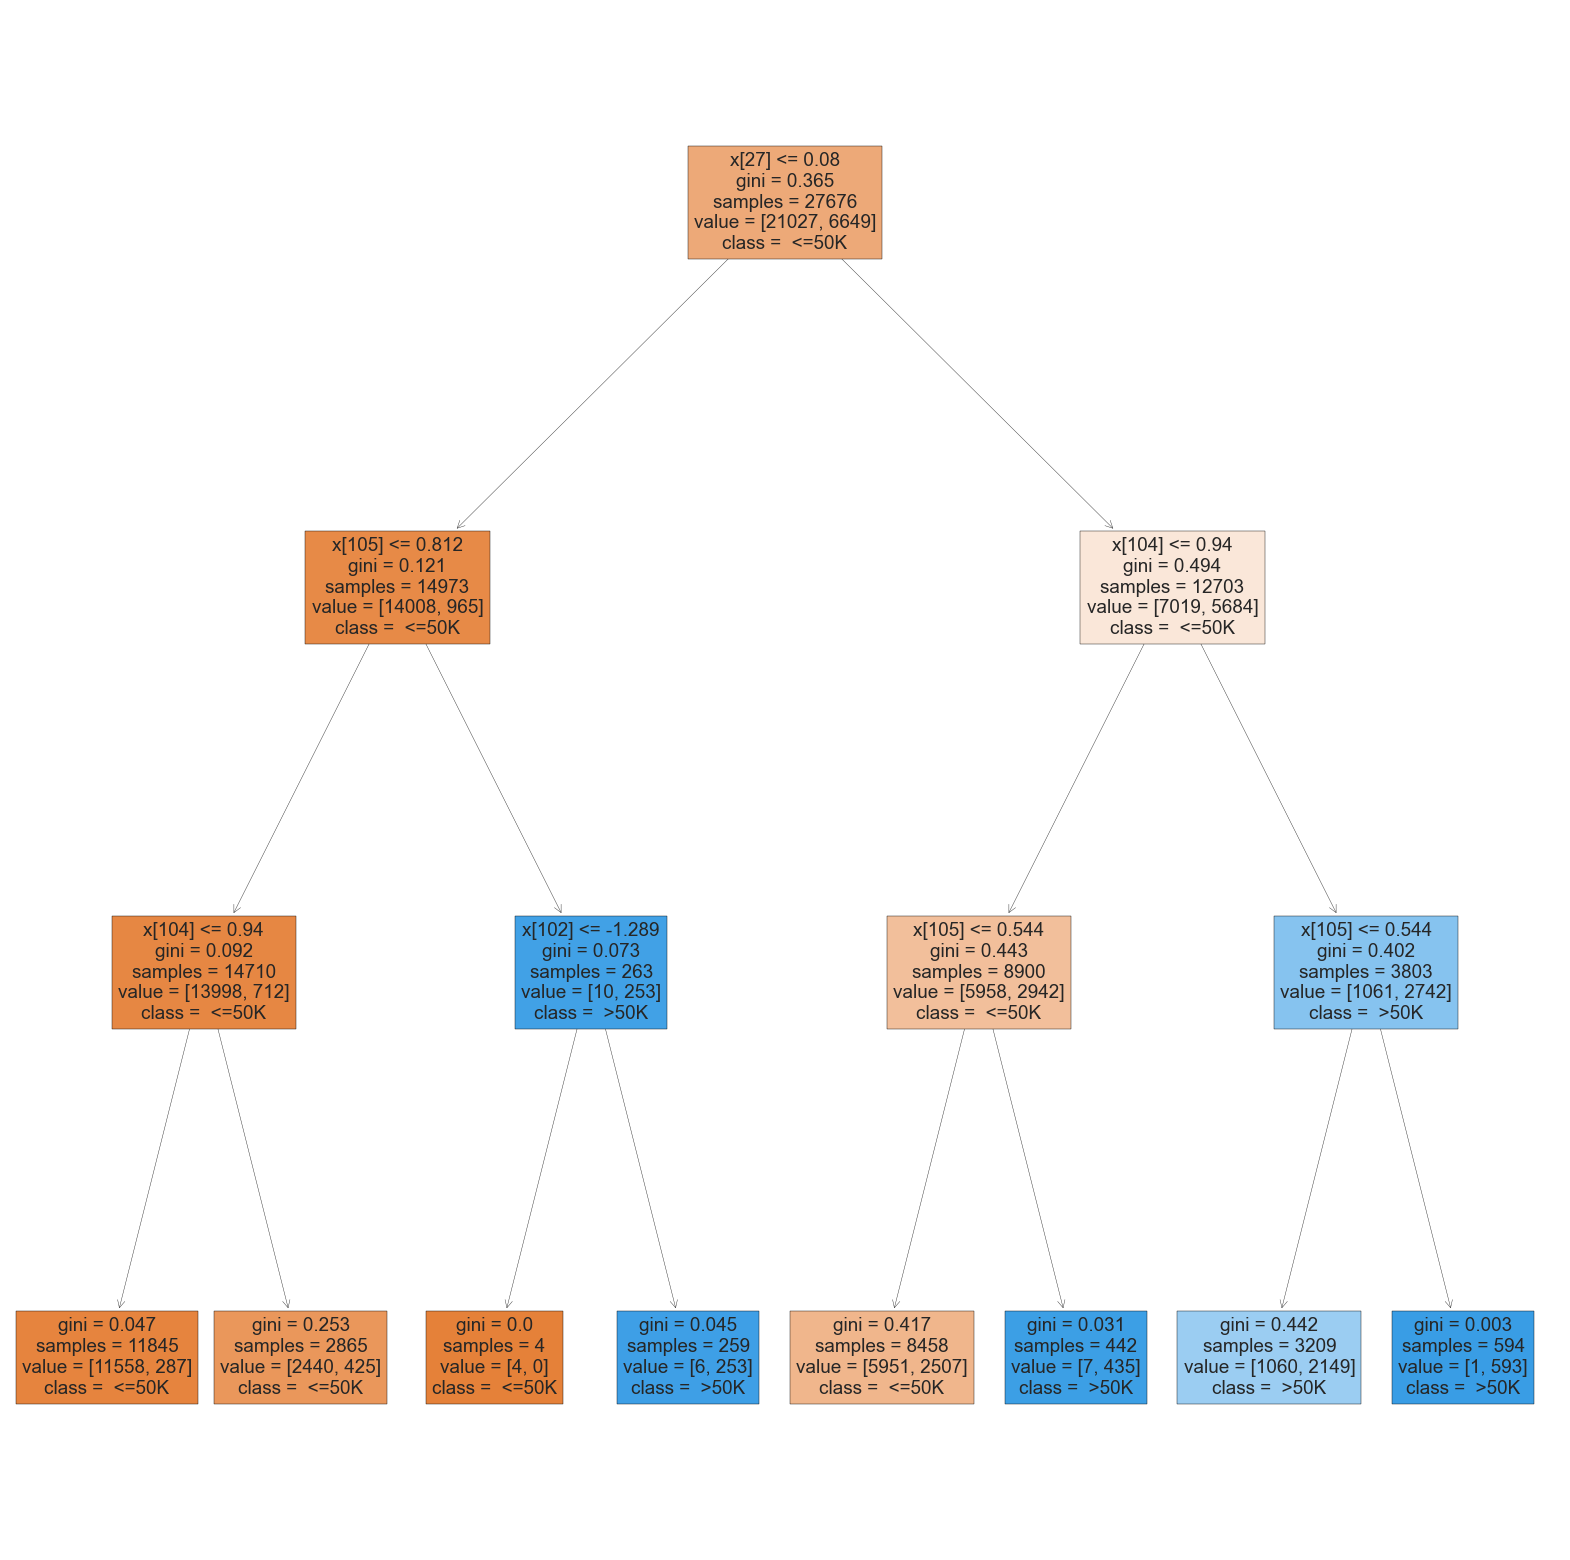

In [49]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(tree_census, class_names=list(tree_census.classes_), filled=True);

### 📍 **Estatísticas de Classificação e Matriz de Confusão**

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [13]:
accuracy_score(y_census_test_set, predictor)

0.8114636642784033

In [14]:
print(classification_report(y_census_test_set, predictor))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.63      0.62      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.75      0.75      4885
weighted avg       0.81      0.81      0.81      4885



0.8114636642784033

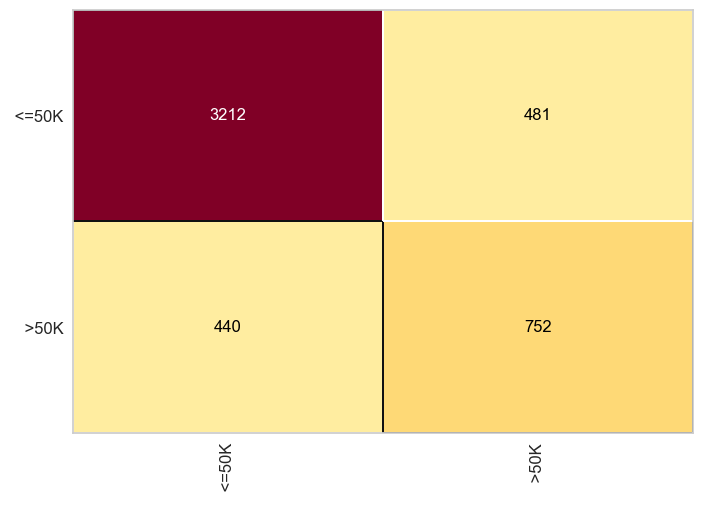

In [15]:
cm = ConfusionMatrix(tree_census)
cm.fit(X_census_training_set, y_census_training_set)
cm.score(X_census_test_set, y_census_test_set)